*** Plano de Negócio ***

Desenvolvimento de uma metodologia para predição de valor do plano
de saúde para seus beneficiários.

In [1]:
#Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


*** ANÁLISE EXPLORATÓRIA ***
Arquivo: Train_Data.csv

In [2]:
#Loading Train dataset
train_data = pd.read_csv("Train_Data.csv")

#Top 5 records
train_data.head()


,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
train_data.shape


(3630, 7)

In [4]:
#Shape of dataset

train_data.isnull().sum()


age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [5]:
#Insights of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [6]:
#Numerical Description of dataset
train_data.describe()


,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Categorical Description of dataset
train_data.describe(include=['O'])


,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


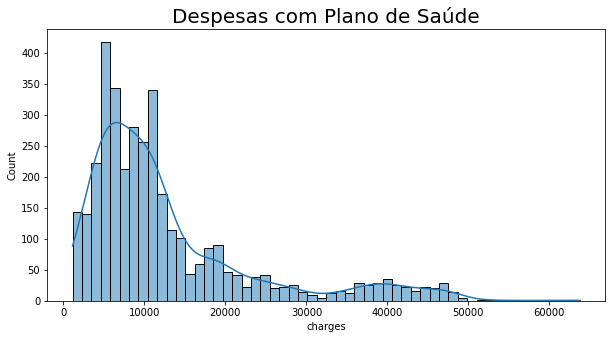

In [8]:
#Histogram of medical insurance charges
plt.figure(figsize=(10,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show();

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


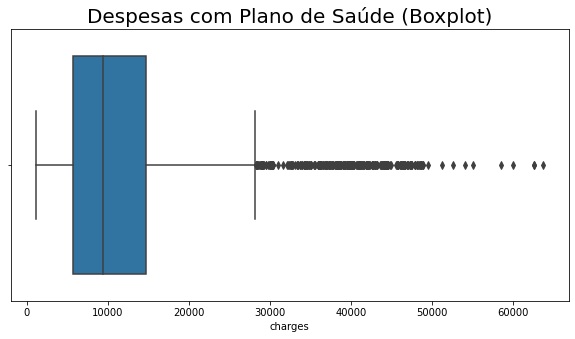

In [9]:
#Boxplot of Medical Insurance Charges
plt.figure(figsize=(10,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=20)
plt.show();

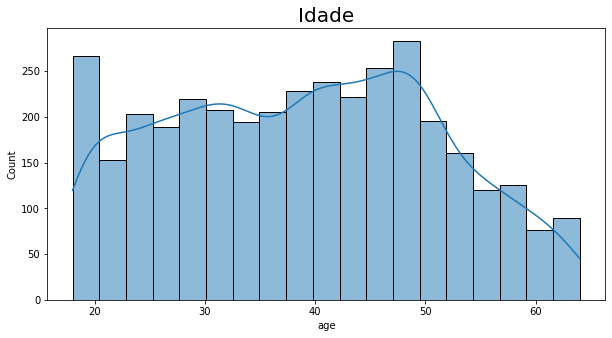

In [10]:
#Histogram of medical insurance age
plt.figure(figsize=(10,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show();

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


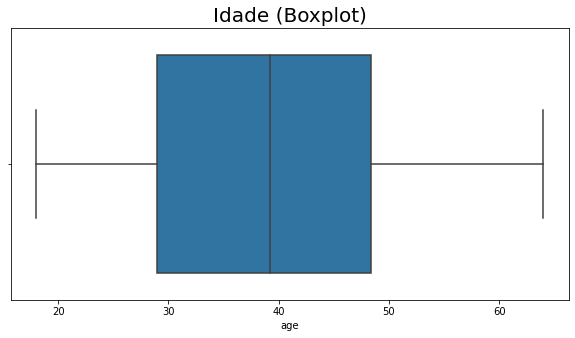

In [11]:
#Boxplot of Medical Insurance age
plt.figure(figsize=(10,5))
sns.boxplot(train_data['age'])
plt.title('Idade (Boxplot)', fontsize=20)
plt.show();

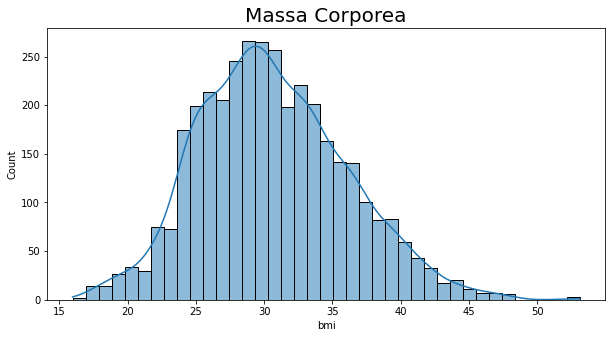

In [12]:
#Histogram of medical insurance BMI
plt.figure(figsize=(10,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Massa Corporea', fontsize=20)
plt.show();

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


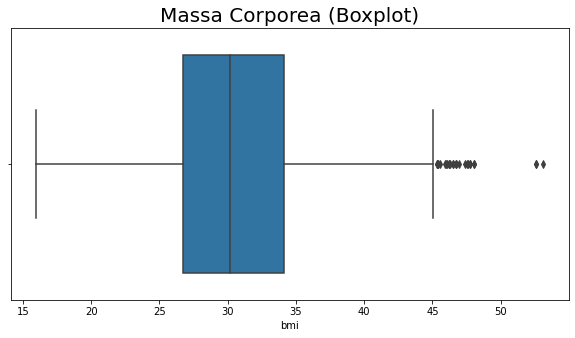

In [13]:
#Boxplot of Medical Insurance age
plt.figure(figsize=(10,5))
sns.boxplot(train_data['bmi'])
plt.title('Massa Corporea (Boxplot)', fontsize=20)
plt.show();

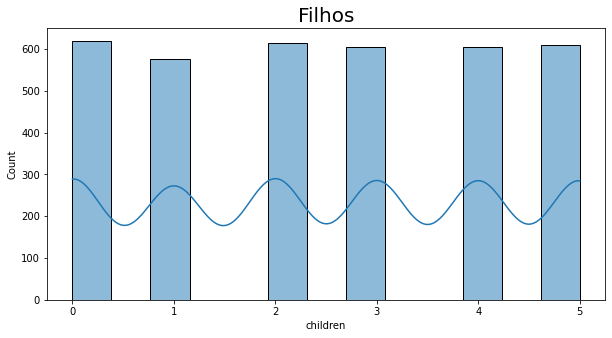

In [14]:
#Histogram of medical insurance Childrens
plt.figure(figsize=(10,5))
sns.histplot(train_data['children'], kde=True)
plt.title('Filhos', fontsize=20)
plt.show();

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


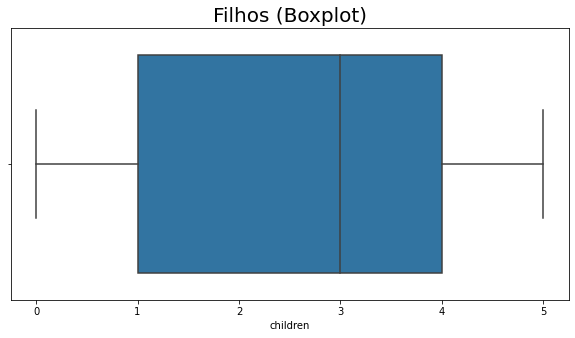

In [15]:
#Boxplot of Medical Insurance Childrens
plt.figure(figsize=(10,5))
sns.boxplot(train_data['children'])
plt.title('Filhos (Boxplot)', fontsize=20)
plt.show();

Male    : 2029
Female  : 1601


e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


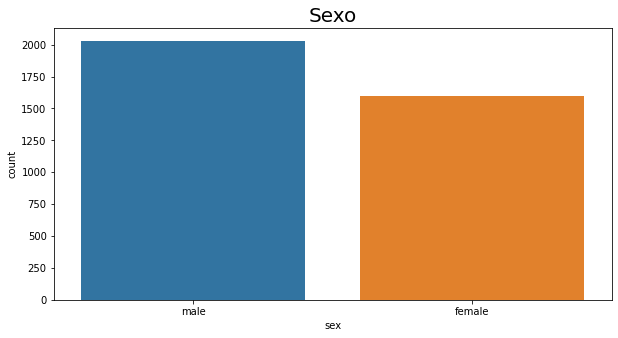

In [16]:
print("Male    :", train_data['sex'].value_counts()[0])
print("Female  :", train_data['sex'].value_counts()[1])

plt.figure(figsize=(10,5))
sns.countplot(train_data['sex'])
plt.title("Sexo", fontsize=20)
plt.show();


e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Smokers      : 560
Non-Smokers  : 3070


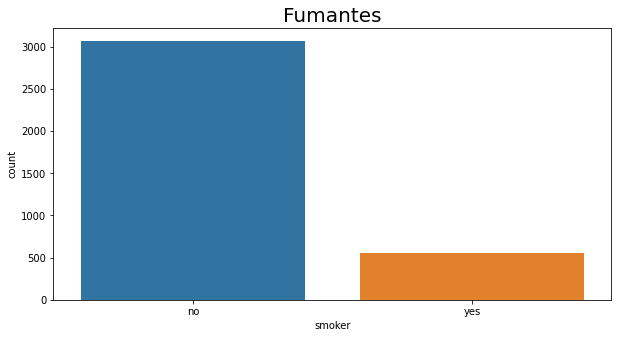

In [17]:
print("Smokers      :", train_data['smoker'].value_counts()[1])
print("Non-Smokers  :", train_data['smoker'].value_counts()[0])

plt.figure(figsize=(10,5))
sns.countplot(train_data['smoker'])
plt.title("Fumantes", fontsize=20)
plt.show();

In [18]:
train_data['region'].value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

e:\GITHUB\datascience\Health_Insurance_Cost\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


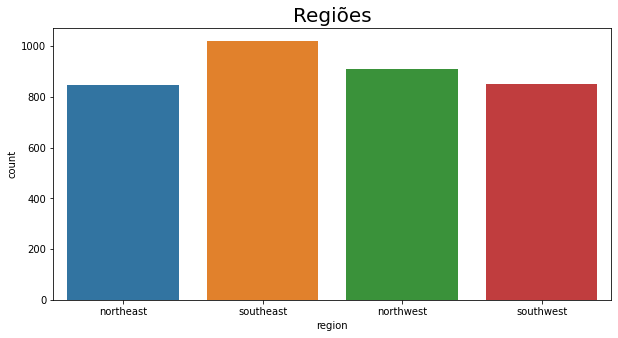

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(train_data['region'])
plt.title("Regiões", fontsize=20)
plt.show();

*** VISUALIZAÇÃO NO SWEETVIZ ***

In [20]:
my_report = sv.analyze(train_data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
# my_report.show_notebook(  w=None, 
#                 h=None, 
#                 scale=None,
#                 layout='widescreen',
#                 filepath=None)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


*** PRÈ PROCESSAMENTO DOS DADOS ***

In [21]:
#Arredondar a variável Age
train_data['age'] = round(train_data['age'])

#Visualizando
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [22]:
#OHEncoding - Transformar as variáveis em numéricas

train_data = pd.get_dummies(train_data, drop_first=True)

#Visualizando
train_data.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [23]:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
#Rearranging Columns to separate "cahrges" to the end of table.

train_data = train_data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

#Visualizando

train_data.head()       

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,21.0,25.745000,2,1,0,0,0,0,3279.868550
1,37.0,25.744165,3,0,1,0,1,0,21454.494239
2,18.0,30.030000,1,1,0,0,1,0,1720.353700
3,37.0,30.676891,3,1,0,0,0,0,6801.437542
4,58.0,32.010000,1,1,0,0,1,0,11946.625900


In [25]:
#Splitting Independent & Dependent Feature

x = train_data.iloc[: ,:-1] # Pega todas as linhas menos sem a última coluna (São os dados de teste sem o resultado)
                            # São as Independent Features
y = train_data.iloc[: , -1] # Pega todas as linhas apenas da última coluna (São apenas o resultado que será utilizado para testar a acurácia do modelo)
                            # São as Dependent Features

In [26]:
#Visualizando as features independentes
x.head(2)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,1,0,0,0,0
1,37.0,25.744165,3,0,1,0,1,0


In [27]:
#Visualizando as features dependentes
y.head(2)


0     3279.868550
1    21454.494239
Name: charges, dtype: float64

In [28]:
#Train test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


*** CONSTRUÇÃO E AVALIAÇÃO DA MAQUINA PREDITIVA ***
A Máquina Preditiva é a metodologia que será utilizada para previsão do custo do plano de saúde.

In [29]:
#Importando Métrica de Avaliação
from sklearn.metrics import mean_squared_error, r2_score


*** MP COM REGRESSÃO LINEAR ***

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

#Prediction
y_pred = LinearRegression.predict(x_test)

#Scores
print(r2_score(y_test, y_pred)*100)
print(mean_squared_error(y_test, y_pred))

74.82602892322036
30898859.035960793


*** MP COM REGRESSÃO RIDGE ***

In [31]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

#Prediction
y_pred = Ridge.predict(x_test)

#Scores
print(r2_score(y_test, y_pred)*100)
print(mean_squared_error(y_test, y_pred))

74.81028884319252
30918178.614604626


*** MP COM REGRESSÃO LASSO ***

In [32]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

#Prediction
y_pred = Lasso.predict(x_test)

#Scores
print(r2_score(y_test, y_pred)*100)
print(mean_squared_error(y_test, y_pred))

74.8226977813626
30902947.722738817


*** MP COM RANDOM FOREST ***

In [33]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

#Prediction
y_pred = RandomForestRegressor.predict(x_test)

#Scores
print(r2_score(y_test, y_pred)*100)
print(mean_squared_error(y_test, y_pred))

90.77059225888189
11328294.924484963


*** SALVAMENTO DA MÁQUINA PREDITIVA PARA DEPLOY OU IMPLEMENTAÇÃO ***

In [34]:
#Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))
